In [37]:
import pandas as pd

from matplotlib import pyplot as plt

purchase=pd.read_csv('purchase.csv')
purchase.head(10)

purchase.shape

(11157, 7)

In [38]:
purchase.describe()

,USER_GENDER,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
count,11157.000000,11145.000000,11157.000000,11155.000000,11156.000000,11157.000000
mean,0.499149,18239.120682,0.666487,6611.681757,11120.029312,0.331272
std,0.500022,6915.821303,0.659351,7582.199676,13056.105601,0.470692
min,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13000.000000,0.000000,0.000000,560.750000,0.000000
50%,0.000000,16000.000000,1.000000,3505.000000,5723.000000,0.000000
75%,1.000000,24000.000000,1.000000,12614.500000,18018.750000,1.000000
max,1.000000,32000.000000,2.000000,29943.000000,49975.000000,1.000000


In [7]:
!pip install pandas_profiling

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
!python -m pip install --upgrade pip --user

  Using cached https://files.pythonhosted.org/packages/c2/d7/90f34cb0d83a6c5631cf71dfe64cc1054598c843a92b400e55675cc2ac37/pip-18.1-py2.py3-none-any.whl


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
import pandas_profiling as pf

pf.ProfileReport(purchase)

Number of variables,7
Number of observations,11157
Total Missing (%),0.0%
Total size in memory,610.2 KiB
Average record size in memory,56.0 B
Numeric,4
Categorical,1
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [39]:
#checking missing observation for missing observation and imputing mean/median

purchase=purchase.replace({'M':1,'U':0})
purchase.head(10)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
0,1,1,25000.0,0,0.0,39171.0,0
1,1,0,20000.0,2,21866.0,249.0,1
2,0,0,30000.0,1,16090.0,1249.0,0
3,0,0,15000.0,0,0.0,7247.0,1
4,1,0,28000.0,2,26888.0,33314.0,1
5,0,1,14000.0,1,2800.0,0.0,0
6,1,1,20000.0,1,4035.0,27436.0,1
7,1,0,23000.0,1,15125.0,31514.0,0
8,0,0,14000.0,2,16415.0,8745.0,1
9,0,1,30000.0,2,5281.0,0.0,1


In [40]:
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.std()/x.mean(),x.min(),x.max(),
                     x.dropna().quantile(0.05),x.dropna().quantile(0.1),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),
                    x.dropna().quantile(0.95),x.dropna().quantile(0.99)],
                    index=['N','NMISS','SUM','MEAN','MEDIAN','STD','VAR','COVAR','MIN','MAX','P5','P10','P25','P50','P75','P95','P99'])




In [41]:
purchase.apply(var_summary)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
N,11157.000000,11157.000000,1.114500e+04,11157.000000,1.115500e+04,1.115600e+04,11157.000000
NMISS,0.000000,0.000000,1.200000e+01,0.000000,2.000000e+00,1.000000e+00,0.000000
SUM,5569.000000,3086.000000,2.032750e+08,7436.000000,7.375331e+07,1.240550e+08,3696.000000
MEAN,0.499149,0.276598,1.823912e+04,0.666487,6.611682e+03,1.112003e+04,0.331272
MEDIAN,0.000000,0.000000,1.600000e+04,1.000000,3.505000e+03,5.723000e+03,0.000000
STD,0.500022,0.447336,6.915821e+03,0.659351,7.582200e+03,1.305611e+04,0.470692
VAR,0.250022,0.200109,4.782858e+07,0.434744,5.748975e+07,1.704619e+08,0.221551
COVAR,1.001749,1.617280,3.791751e-01,0.989292,1.146788e+00,1.174107e+00,1.420862
MIN,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000
MAX,1.000000,1.000000,3.200000e+04,2.000000,2.994300e+04,4.997500e+04,1.000000


In [42]:
purchase['PRICE']=purchase['PRICE'].fillna(purchase['PRICE'].mean())
purchase['PUR_VALUE']=purchase['PUR_VALUE'].fillna(purchase['PUR_VALUE'].median())
purchase['USER_INCOME']=purchase['USER_INCOME'].fillna(purchase['USER_INCOME'].median())

purchase.apply(var_summary)

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
N,11157.000000,11157.000000,1.115700e+04,11157.000000,1.115700e+04,1.115700e+04,11157.000000
NMISS,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
SUM,5569.000000,3086.000000,2.034939e+08,7436.000000,7.376032e+07,1.240608e+08,3696.000000
MEAN,0.499149,0.276598,1.823912e+04,0.666487,6.611125e+03,1.111955e+04,0.331272
MEDIAN,0.000000,0.000000,1.600000e+04,1.000000,3.505000e+03,5.723000e+03,0.000000
STD,0.500022,0.447336,6.912101e+03,0.659351,7.581634e+03,1.305562e+04,0.470692
VAR,0.250022,0.200109,4.777714e+07,0.434744,5.748118e+07,1.704492e+08,0.221551
COVAR,1.001749,1.617280,3.789712e-01,0.989292,1.146799e+00,1.174115e+00,1.420862
MIN,0.000000,0.000000,9.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000
MAX,1.000000,1.000000,3.200000e+04,2.000000,2.994300e+04,4.997500e+04,1.000000


USER_INCOME    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

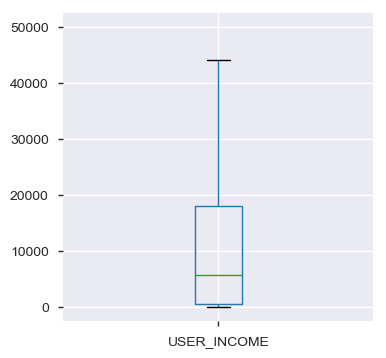

In [43]:
purchase['USER_INCOME'].plot(subplots=True, kind='box', layout=(1,1),figsize=[4,4])

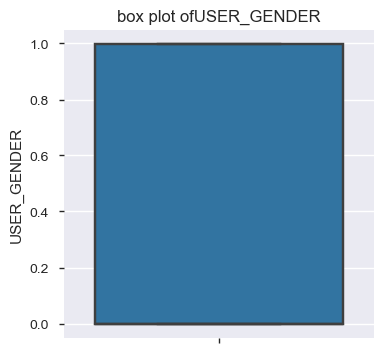

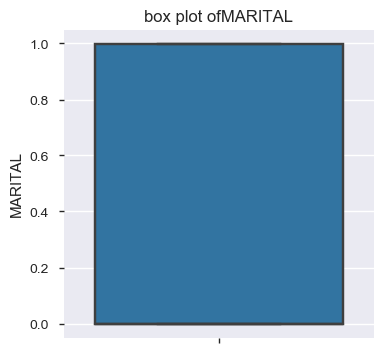

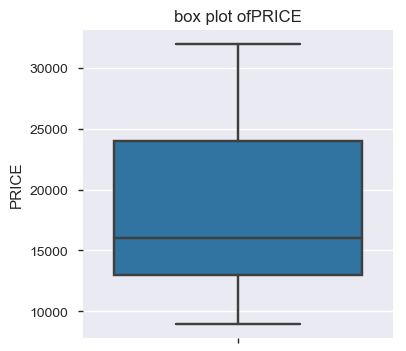

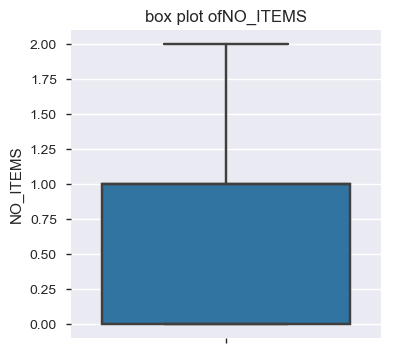

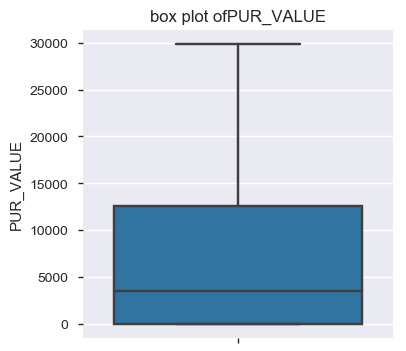

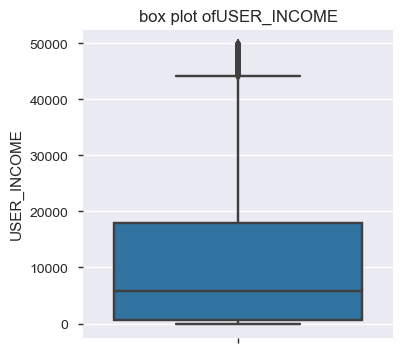

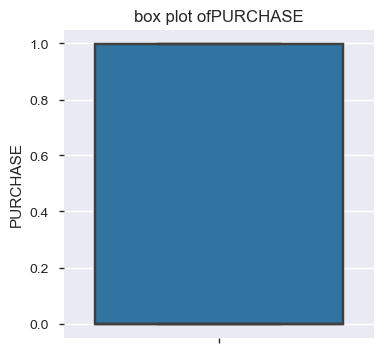

In [44]:
import seaborn as sns

from matplotlib.backends.backend_pdf import PdfPages

var_names =[key for key in dict(purchase.dtypes)]

bp=PdfPages('boxplots Purchase Data.pdf')

for num_variable in var_names:
    fig,axes=plt.subplots(figsize=(4,4))
    sns.boxplot(y=num_variable,data= purchase)
    plt.title(str('box plot of')+str(num_variable))
    bp.savefig(fig)
bp.close()

In [46]:
#removing outliers

upper=purchase['USER_INCOME'].quantile(0.75)+1.5*purchase['USER_INCOME'].quantile(0.75)-purchase['USER_INCOME'].quantile(0.25)
lower=purchase['USER_INCOME'].quantile(0.25)-1.5*purchase['USER_INCOME'].quantile(0.75)-purchase['USER_INCOME'].quantile(0.25)

#purchase['USER_INCOME']=purchase['USER_INCOME'].clip_upper(purchase['USER_INCOME'].quantile(0.975))
#purchase['USER_INCOME']=purchase['USER_INCOME'].clip_upper(purchase['USER_INCOME'].quantile(0.025))

purchase['USER_INCOME']=purchase['USER_INCOME'].clip_upper(upper)
purchase['USER_INCOME']=purchase['USER_INCOME'].clip_upper(lower)


In [1]:
import seaborn as sns

from matplotlib.backends.backend_pdf import PdfPages

var_names =[key for key in dict(purchase.dtypes)]

bp=PdfPages('boxplots Purchase Data.pdf')

for num_variable in var_names:
    fig,axes=plt.subplots(figsize=(4,4))
    sns.boxplot(y=num_variable,data= purchase)
    plt.title(str('box plot of')+str(num_variable))
    bp.savefig(fig)
bp.close()

NameError: name 'purchase' is not defined

In [ ]:
### Applying Chi-Square test 